In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 64) #63 columns in original data
sns.set()

dim = (16,8)
fs=16

In [2]:
!unzip archive.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
#replace path with csv file location
csv_file = 'mental-heath-in-tech-2016_20161114.csv'
df = pd.read_csv(csv_file)
df.shape

(1433, 63)

In [5]:
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [132]:
df.dtypes.value_counts()

object     56
int64       4
float64     3
dtype: int64

In [133]:
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.00,1146.00,263.00,287.00,1433.00,1433.00,1433.00
mean,0.20,0.77,0.94,0.64,0.88,0.59,34.29
std,0.40,0.42,0.23,0.48,0.32,0.49,11.29
min,0.00,0.00,0.00,0.00,0.00,0.00,3.00
25%,0.00,1.00,1.00,0.00,1.00,0.00,28.00
50%,0.00,1.00,1.00,1.00,1.00,1.00,33.00
75%,0.00,1.00,1.00,1.00,1.00,1.00,39.00
max,1.00,1.00,1.00,1.00,1.00,1.00,323.00


# checking if there are null values

In [10]:
df.apply(lambda x: sum(x.isnull()), axis=0)# checking for null values in data

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

In [12]:
df["Are you self-employed?"].value_counts()
# there are 287 self-employed and 1146 employed respondents.

0    1146
1     287
Name: Are you self-employed?, dtype: int64

# creating df2 with all rows where self employed == 0

In [13]:
# drop self-employed respondents
df2 = df.copy()
df2 = df2[df2["Are you self-employed?"]==0]
df2.shape 

(1146, 63)

In [14]:
# relook df2
df2.head()
# notice several columns with many nan values - may need to drop.

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [15]:
df2.describe()
# notice that col
# "Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?"
# is completely empty and will be dropped

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1146.00,1146.00,263.00,0.00,1146.00,1146.00,1146.00
mean,0.00,0.77,0.94,NaN,0.89,0.57,33.66
std,0.00,0.42,0.23,NaN,0.32,0.49,11.70
min,0.00,0.00,0.00,NaN,0.00,0.00,3.00
25%,0.00,1.00,1.00,NaN,1.00,0.00,28.00
50%,0.00,1.00,1.00,NaN,1.00,1.00,32.00
75%,0.00,1.00,1.00,NaN,1.00,1.00,38.00
max,0.00,1.00,1.00,NaN,1.00,1.00,323.00


In [16]:
df2.describe(include=['O'])
# some columns are completely empty and will be dropped
# some columns are irrelevant and will be dropped

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another indivi

### 2.B Drop empty or irrelevant columns

In [17]:
def col_ls(df):
    '''
    Prints out column names of df and its column index
    for ease of reading.
    
    Also returns a list of column names.'''
    ls = []
    for i, c in enumerate(df.columns):
        print(i, c)
        ls.append(c)
    return ls


In [18]:
df2_col = col_ls(df2)

0 Are you self-employed?
1 How many employees does your company or organization have?
2 Is your employer primarily a tech company/organization?
3 Is your primary role within your company related to tech/IT?
4 Does your employer provide mental health benefits as part of healthcare coverage?
5 Do you know the options for mental health care available under your employer-provided coverage?
6 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
7 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
8 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
9 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
10 Do you think that discussing a mental health disorder with your employer would have negative consequences?

In [19]:
df2_col[16]

'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?'

In [32]:
df2.apply(lambda x: sum(x.isnull()), axis=0).value_counts()# checking for null values in data


0       32
131     11
1146     8
3        1
133      1
896      1
276      1
250      1
430      1
883      1
52       1
437      1
583      1
635      1
701      1
dtype: int64

# Dropping empty and irrelevant columns from DF2 and saving to DF3

In [35]:
empty_col = [
            "Do you know local or online resources to seek help for a mental health disorder?",
            "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?",
            "If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?",
            "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",
            "If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",
            "Do you believe your productivity is ever affected by a mental health issue?",
            "If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"]
empty_col += [df2_col[16]]
irre_col = ["Are you self-employed?",
            "What US state or territory do you work in?",
           "What US state or territory do you live in?",
           "What country do you live in?",
           "Why or why not?",
           "Why or why not?.1"]
df3 = df2.copy()
df3 = df3.drop(empty_col+irre_col,axis=1)
df3.shape

(1146, 49)

In [19]:
df3_col = col_ls(df3)

0 How many employees does your company or organization have?
1 Is your employer primarily a tech company/organization?
2 Is your primary role within your company related to tech/IT?
3 Does your employer provide mental health benefits as part of healthcare coverage?
4 Do you know the options for mental health care available under your employer-provided coverage?
5 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
6 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
7 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
8 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
9 Do you think that discussing a mental health disorder with your employer would have negative consequences?
10 Do you think that disc

In [20]:
df3.describe()

,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1146.00,263.00,1146.00,1146.00,1146.00
mean,0.77,0.94,0.89,0.57,33.66
std,0.42,0.23,0.32,0.49,11.70
min,0.00,0.00,0.00,0.00,3.00
25%,1.00,1.00,1.00,0.00,28.00
50%,1.00,1.00,1.00,1.00,32.00
75%,1.00,1.00,1.00,1.00,38.00
max,1.00,1.00,1.00,1.00,323.00


In [21]:
df3.describe(include=['O'])

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you work in?,Which of th

# Checking Unique and Null Value count

In [37]:
def val(df):
    '''
    Prints out columns, its unique values and value counts,
    as well as null value count.
    To aid in data cleaning.'''
    for i, c in enumerate(df.columns):
        print(i,c)
        print()
        unique = df[c].unique()
        if len(unique) > 10:
            print("### More than 10 unique values. ###")
            print('### Special attention required for col\n{} {}\n###'.format(i,c))
            print()
        else:
            print(unique)
            print()
            print(df[c].value_counts())
            vc = df[c].value_counts().sum()
            print()
            print("Value count: ",vc)
        nc = df[c].isna().sum()
        print("Null value count: ",nc)
        print("Null %: {:.2f}%".format(100*nc/(nc+vc)))            
        print()

In [23]:
# preview columns, values, counts, etc
# identify columns that require special attention
# i.e. more than 10 unique values
val(df3)

0 How many employees does your company or organization have?

['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']

26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: How many employees does your company or organization have?, dtype: int64

Value count:  1146
Null value count:  0
Null %: 0.00%

1 Is your employer primarily a tech company/organization?

[1. 0.]

1.00    883
0.00    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

Value count:  1146
Null value count:  0
Null %: 0.00%

2 Is your primary role within your company related to tech/IT?

[nan  1.  0.]

1.00    248
0.00     15
Name: Is your primary role within your company related to tech/IT?, dtype: int64

Value count:  263
Null value count:  883
Null %: 77.05%

3 Does your employer provide mental health benefits as part of healthcare coverage?

['Not eligible for coverage / N/A' 'No' 'Yes' "I don't kn

# Storing df3 to df4 and coverting categorical values to numerical values along with filling null values if any

In [38]:
df4 = df3.copy()

###
rp_col = "How many employees does your company or organization have?"
# fill na
# df4[cdf4[rp_col]] = df4[cdf4[rp_col]].fillna(-1)
# replace labels with
rp_dt = {'1-5':1,
        '6-25':6,
        '26-100':26,
        '100-500':101,
        '500-1000':501,
        'More than 1000':1001}

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Is your primary role within your company related to tech/IT?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA

rp_col = "Does your employer provide mental health benefits as part of healthcare coverage?"
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        'Not eligible for coverage / N/A':-1
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you know the options for mental health care available under your employer-provided coverage?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'I am not sure':2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Does your employer offer resources to learn more about mental health concerns and options for seeking help?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {"Very easy":1, # positive/yes response to qn will be 1
        "Somewhat easy":2, # responses in increasing negativity will be 2 onwards
        "Neither easy nor difficult":3,
         "I don't know":3,
         "Somewhat difficult":4,
         "Very difficult":5
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a mental health disorder with your employer would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a physical health issue with your employer would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you feel comfortable discussing a mental health disorder with your coworkers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you feel that your employer takes mental health as seriously as physical health?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'No':2, # responses in increasing negativity will be 2 onwards,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you have previous employers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {0:2 # replace 0 (no) with 2 for consistency
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have your previous employers provided mental health benefits?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'No, none did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Were you aware of the options for mental health care provided by your previous employers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, I was aware of all of them':1, # positive/yes response to qn will be 1
        'I was aware of some':2, # responses in increasing negativity will be 2 onwards,
        'No, I only became aware later':3,
         'N/A (not currently aware)':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did your previous employers provide resources to learn more about mental health issues and how to seek help?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, always':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'No':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a mental health disorder with previous employers would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, all of them':1, # positive/yes response to qn will be 1
        'Some of them':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None of them':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that discussing a physical health issue with previous employers would have negative consequences?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, all of them':1, # positive/yes response to qn will be 1
        'Some of them':2, # responses in increasing negativity will be 2 onwards,
         'None of them':3
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you have been willing to discuss a mental health issue with your previous co-workers?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, at all of my previous employers':1, # positive/yes response to qn will be 1
        'Some of my previous employers':2, # responses in increasing negativity will be 2 onwards,
         'No, at none of my previous employers':3
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, at all of my previous employers':1, # positive/yes response to qn will be 1
        'Some of my previous employers':2, # responses in increasing negativity will be 2 onwards,
         "I don't know":3,
         'No, at none of my previous employers':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did you feel that your previous employers took mental health as seriously as physical health?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they all did':1, # positive/yes response to qn will be 1
        'Some did':2, # responses in increasing negativity will be 2 onwards,
        "I don't know":3,
         'None did':4
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, all of them':1, # positive/yes response to qn will be 1
        'Some of them':2, # responses in increasing negativity will be 2 onwards,
         'None of them':3
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you be willing to bring up a physical health issue with a potential employer in an interview?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Would you bring up a mental health issue with a potential employer in an interview?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you feel that being identified as a person with a mental health issue would hurt your career?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, it has':1, # positive/yes response to qn will be 1
        'Yes, I think it would':2, # responses in increasing negativity will be 2 onwards,
        'Maybe':3,
         "No, I don't think it would":4,
         'No, it has not':5
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, they do':1, # positive/yes response to qn will be 1
         'Yes, I think they would':2, # responses in increasing negativity will be 2 onwards,
        'Maybe':3,
         "No, I don't think they would":4,
         'No, they do not':5
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "How willing would you be to share with friends and family that you have a mental illness?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Very open':1, # positive/yes response to qn will be 1
         'Somewhat open':2, # responses in increasing negativity will be 2 onwards,
        'Neutral':3,
         'Somewhat not open':4,
         'Not open at all':5,
         'Not applicable to me (I do not have a mental illness)':-1
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes, I experienced':1, # positive/yes response to qn will be 1
         'Yes, I observed':2, # responses in increasing negativity will be 2 onwards,
        'Maybe/Not sure':3,
         'No':4,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"
# nan values is 55.41%; unsure what is the cause of nan values
# drop column
df4 = df4.drop([rp_col],axis=1)

###
rp_col = "Do you have a family history of mental illness?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        "I don't know":2, # responses in increasing negativity will be 2 onwards
        'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you had a mental health disorder in the past?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you currently have a mental health disorder?"
# potential target column or key X column
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'Maybe':2, # responses in increasing negativity will be 2 onwards,
         'No':3,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you been diagnosed with a mental health condition by a medical professional?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Yes':1, # positive/yes response to qn will be 1
        'No':2, # responses in increasing negativity will be 2 onwards,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Have you ever sought treatment for a mental health issue from a mental health professional?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {1:1, # positive/yes response to qn will be 1
        0:2, # responses in increasing negativity will be 2 onwards,
        }

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Often':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        'Rarely':3,
        'Never':4,
        'Not applicable to me':-1}

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Often':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        'Rarely':3,
        'Never':4,
        'Not applicable to me':-1}

df4[rp_col] = df4[rp_col].replace(rp_dt)

###
rp_col = "Do you work remotely?"
df4[rp_col] = df4[rp_col].fillna(-1) #for NA
rp_dt = {'Always':1, # positive/yes response to qn will be 1
        'Sometimes':2, # responses in increasing negativity will be 2 onwards,
        'Never':3,
       }

df4[rp_col] = df4[rp_col].replace(rp_dt)

#####
df4.describe(include='all')

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively

In [43]:
rp_col = "How many employees does your company or organization have?"
df4[rp_col]

0         26
1          6
2          6
4          6
5       1001
        ... 
1426     101
1427     501
1430     101
1431     101
1432     101
Name: How many employees does your company or organization have?, Length: 1146, dtype: int64

### 2.D Employer Type & Role

In [44]:
df4["Is your employer primarily a tech company/organization?"].value_counts()
# employer of 263 respondents is not primarily tech
# there are 883 respondents whose employers are primarily tech

1.00    883
0.00    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

In [45]:
df4["Is your primary role within your company related to tech/IT?"].value_counts()
# 883 '-1' responses correspond to num of respondents whose employers are primarily tech
# 15 respondents are neither in a tech company nor in a tech role
# these 15 respondents will be dropped
# expect 883+248 = 1131 rows left

-1.00    883
1.00     248
0.00      15
Name: Is your primary role within your company related to tech/IT?, dtype: int64

In [46]:
df4.shape

(1146, 48)

# making a copy of Df4 and dropping all respondents who are neither in a tech company nor in a tech role

In [48]:
# drop 15 respondents who are neither in tech company nor in tech role
df5 = df4.copy()
df5 = df5[df5["Is your primary role within your company related to tech/IT?"].isin([-1,1])]
df5.shape
# (1131, 48)


(1131, 48)

# Renaming and dropping a column which is a repetitvie qs (Is your primary role within your company related to tech/IT?)

In [49]:
# rename first column, drop other column
err_msg = "Column has been dropped, renamed, or does not exist."
try: 
    df5 = df5.rename(columns={"Is your employer primarily a tech company/organization?":"tech_company_or_role"})
    df5 = df5.drop(["Is your primary role within your company related to tech/IT?"],axis=1)
except:
    print(err_msg)
    
df5.head(1)    

,How many employees does your company or organization have?,tech_company_or_role,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?","If maybe, what condition(s) do you believe you have?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Which of the following be

In [50]:
df5.shape

(1131, 47)

### 2.E Age
* The IQR method of identifying outliers may not work well in this situation.
* Instead, common sense will be applied.
* Values below minimum legal working age of 13 (SG: 13; US: 14) will be replaced with mode age of 32.
* Values more than a decade above retirement age of 62 (SG: 62; US: 66) will be replaced with mode age of 32.
* This approach assumes that ages below 13 and above 72 are incorrect - either due to typos or intentional obscuration.

# Removing all columns (MHDD and MHDS) will be dealt later and saving it in df6

In [51]:
# brief detour:
# drop both MHDD and MHDS
# these columns will be dealt with in a later section 3.B
df6 = df5.copy()
df6 = df6.drop(["If yes, what condition(s) have you been diagnosed with?",
         "If maybe, what condition(s) do you believe you have?",
               "If so, what condition(s) were you diagnosed with?"],axis=1)
df6.head(1)

,How many employees does your company or organization have?,tech_company_or_role,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,26,1.00,-1,-1,3,3,2,1,3,3,2,1,2,2,1,4,4,3,4,3,2,3,2,2,3,3,2,2,3,4,2,4,3,1,3,1,2,-1,-1,39,Male,United Kingdom

In [52]:
df6.shape

(1131, 44)

In [53]:
df6['What is your age?'].describe()
# min: 3, max 323 - weird values!

count   1131.00
mean      33.61
std       11.66
min        3.00
25%       28.00
50%       32.00
75%       38.00
max      323.00
Name: What is your age?, dtype: float64

# removing outliers in age and replacing it with mode 32

In [54]:
def rp_age(age):
    '''
    Replaces age below min or age above max with mode age.
    Else, returns age.'''
    mode = 32
    low,up = 13,72
    if age < 13: 
        return mode
    elif age > 72: 
        return mode
    else: return int(age)

In [56]:
# replace age
df6['What is your age?'] = df6['What is your age?'].apply(rp_age)

In [33]:
df6["What is your gender?"].value_counts()
# many ways to say same thing
# 'Others' category needed to hold responses that are not obviously 'Male' or 'Female'

Male                                                       501
male                                                       194
Female                                                     118
female                                                      76
M                                                           69
m                                                           55
F                                                           23
f                                                           20
Female                                                       6
Male                                                         5
woman                                                        4
non-binary                                                   4
male                                                         2
Agender                                                      2
female                                                       2
man                                                    

# Converting textual values of gender to numerical values which are 1(male) 2(female) 3(other) and saving it in df7

In [57]:
df7 = df6.copy()
# prepare replacement lists
male_ls = ['Male','male', 'Male ', 'M', 'm', 'man', 'Cis male',
           'Male.', 'Male (cis)', 'Man', 'Sex is male',
           'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
           'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
           'cisdude', 'cis man', 'MALE']
# FYI: cisgender: describes a person who identifies as the same gender assigned at birth
female_ls = ['Female','female', 'I identify as female.', 'female ',
             'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
             'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
             'Female ', 'woman', 'female/woman', 'Cisgender Female', 
             'mtf', 'fem', 'Female (props for making this a freeform field, though)',
             ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
             'Cis female ']
# FYI: AFAB: assigned female at birth
other_ls = ['Bigender', 'non-binary,', 'Genderfluid (born female)',
            'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
            'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
            'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
            'Genderflux demi-girl', 'female-bodied; no feelings about gender',
            'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
            'Unicorn', 'human', 'Genderqueer']

# replace gender values with numberic labels
df7["What is your gender?"] = df7["What is your gender?"].replace(male_ls,1)
df7["What is your gender?"] = df7["What is your gender?"].replace(female_ls,2)
df7["What is your gender?"] = df7["What is your gender?"].replace(other_ls,3)
df7["What is your gender?"] = df7["What is your gender?"].fillna(3)
df7["What is your gender?"].unique()


array([1., 2., 3.])

In [59]:
df7['What country do you work in?'].unique()

array(['United Kingdom', 'United States of America', 'Canada', 'Germany',
       'Netherlands', 'Australia', 'France', 'Belgium', 'Brazil',
       'Denmark', 'Sweden', 'Russia', 'Spain', 'India',
       'United Arab Emirates', 'Mexico', 'Switzerland', 'Norway',
       'Argentina', 'Ireland', 'Italy', 'Colombia', 'Czech Republic',
       'Vietnam', 'Finland', 'Bulgaria', 'South Africa', 'Slovakia',
       'Bangladesh', 'Pakistan', 'New Zealand', 'Afghanistan', 'Poland',
       'Other', 'Iran', 'Hungary', 'Israel', 'Japan', 'Ecuador',
       'Bosnia and Herzegovina', 'Austria', 'Romania', 'Chile', 'Estonia'],
      dtype=object)

# Replacing country names in country column with their indexes and saving in df8

In [60]:
df8 = df7.copy()
country_rp_dt = {}
for idx, name in enumerate(df8['What country do you work in?'].unique()):
#     print(idx, name)
    country_rp_dt[name] = idx
# country_rp_dt
df8['What country do you work in?'] = df8['What country do you work in?'].replace(country_rp_dt)

In [62]:
df8['What country do you work in?'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype=int64)

# Dropping Work position column and saving it in df9

In [66]:
# extract column
work_pos_s = df8['Which of the following best describes your work position?']


In [67]:
df9 = df8.copy()
df9 = df9.drop(["Which of the following best describes your work position?"],axis=1)
df9.head(1)

,How many employees does your company or organization have?,tech_company_or_role,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Do you work remotely?
0,26,1.00,-1,-1,3,3,2,1,3,3,2,1,2,2,1,4,4,3,4,3,2,3,2,2,3,3,2,2,3,4,2,4,3,1,3,1,2,-1,-1,39,1.00,0,2


In [68]:
df9.shape

(1131, 43)

In [69]:
# for easy viewing
cdf9 = col_ls(df9)

0 How many employees does your company or organization have?
1 tech_company_or_role
2 Does your employer provide mental health benefits as part of healthcare coverage?
3 Do you know the options for mental health care available under your employer-provided coverage?
4 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
5 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
6 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
7 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
8 Do you think that discussing a mental health disorder with your employer would have negative consequences?
9 Do you think that discussing a physical health issue with your employer would have negative consequences?
10 Would you fe

# Renaming all Columns and saving in df10

In [70]:
df10 = df9.copy()

df_rn_dt = {
    "How many employees does your company or organization have?":"num_employees",
    "Does your employer provide mental health benefits as part of healthcare coverage?":"cep_benefits",
    "Do you know the options for mental health care available under your employer-provided coverage?":"cep_know_options",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?":"cep_discuss",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?":"cep_learn",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?":"cep_anon",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:":"cep_mh_leave",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?":"cep_mh_ncsq",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?":"cep_ph_ncsq",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?":"cep_comf_cw",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?":"cep_comf_sup",
    "Do you feel that your employer takes mental health as seriously as physical health?":"cep_serious",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?":"cep_others_ncsq",
    "Do you have previous employers?":"pep_have",
    "Have your previous employers provided mental health benefits?":"pep_benefits",
    "Were you aware of the options for mental health care provided by your previous employers?":"pep_know_options",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?":"pep_discuss",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?":"pep_learn",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?":"pep_anon",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?":"pep_mh_ncsq",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?":"pep_ph_ncsq",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?":"pep_comf_cw",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?":"pep_comf_sup",
    "Did you feel that your previous employers took mental health as seriously as physical health?":"pep_serious",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?":"pep_others_ncsq",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?":"fep_ph_willing",
    "Would you bring up a mental health issue with a potential employer in an interview?":"fep_mh_willing",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?":"hurt_career",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?":"cw_view_neg",
    "How willing would you be to share with friends and family that you have a mental illness?":"comf_ff",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?":"neg_response",
    "Do you have a family history of mental illness?":"mh_fam_hist",
    "Have you had a mental health disorder in the past?":"mh_hist",
    "Do you currently have a mental health disorder?":"mh_cur",
    "Have you been diagnosed with a mental health condition by a medical professional?":"mh_diag_pro",
    "Have you ever sought treatment for a mental health issue from a mental health professional?":"sought_treat",
    "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?":"work_affect_effect",
    "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?":"work_affect_ineffect",
    "What is your age?":"age",
    "What is your gender?":"gender",
    "What country do you work in?":"work_country",
    "Do you work remotely?":"work_remote"
}

df10=df10.rename(columns=df_rn_dt)


In [90]:
renamed = pd.DataFrame(list(df_rn_dt.items()),columns = ['Question','Renamed'])
renamed.to_csv('rename.csv')
renamed

,Question,Renamed
0,How many employees does your company or organi...,num_employees
1,Does your employer provide mental health benef...,cep_benefits
2,Do you know the options for mental health care...,cep_know_options
3,Has your employer ever formally discussed ment...,cep_discuss
4,Does your employer offer resources to learn mo...,cep_learn
5,Is your anonymity protected if you choose to t...,cep_anon
6,If a mental health issue prompted you to reque...,cep_mh_leave
7,Do you think that discussing a mental health d...,cep_mh_ncsq
8,Do you think that discussing a physical health...,cep_ph_ncsq
9,Would you feel comfortable discussing a mental...,cep_comf_cw


In [155]:
df10.head(1)

,num_employees,tech_company_or_role,cep_benefits,cep_know_options,cep_discuss,cep_learn,cep_anon,cep_mh_leave,cep_mh_ncsq,cep_ph_ncsq,cep_comf_cw,cep_comf_sup,cep_serious,cep_others_ncsq,pep_have,pep_benefits,pep_know_options,pep_discuss,pep_learn,pep_anon,pep_mh_ncsq,pep_ph_ncsq,pep_comf_cw,pep_comf_sup,pep_serious,pep_others_ncsq,fep_ph_willing,fep_mh_willing,hurt_career,cw_view_neg,comf_ff,neg_response,mh_fam_hist,mh_hist,mh_cur,mh_diag_pro,sought_treat,work_affect_effect,work_affect_ineffect,age,gender,work_country,work_remote
0,26,1.00,-1,-1,3,3,2,1,3,3,2,1,2,2,1,4,4,3,4,3,2,3,2,2,3,3,2,2,3,4,2,4,3,1,3,1,2,-1,-1,39,1.00,0,2


# Data Visualization

# visualizing mental health currently with gender

c:\users\aa\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1800x1200 with 0 Axes>

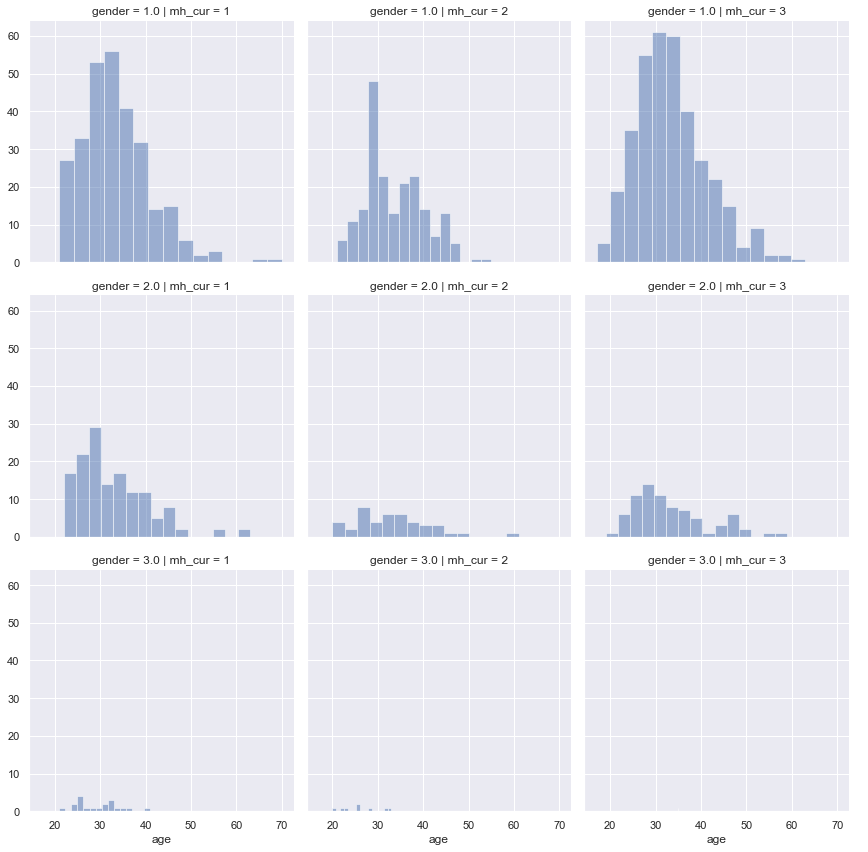

<Figure size 432x288 with 0 Axes>

In [164]:
plt.figure(dpi=300)
g = sns.FacetGrid(df10,row="gender",col="mh_cur",size=4)
g.map(plt.hist,'age',alpha=0.5,bins=15)
g.add_legend()
plt.show()
plt.savefig('filename.png')

In [73]:
df10['gender'].value_counts()

1.00    841
2.00    262
3.00     28
Name: gender, dtype: int64

In [74]:
df5["If so, what condition(s) were you diagnosed with?"].describe()

count                                                   557
unique                                                   90
top       Mood Disorder (Depression, Bipolar Disorder, etc)
freq                                                    151
Name: If so, what condition(s) were you diagnosed with?, dtype: object

In [78]:
df5["If yes, what condition(s) have you been diagnosed with?"].isnull().sum()

692

# Describing Columns related to MHDD and MHDS

In [44]:
# df5.describe(include='all')
print("Responses to 'Do you have MHD?':")
print(df5["Do you currently have a mental health disorder?"].value_counts())
df5[["Do you currently have a mental health disorder?",
     "If yes, what condition(s) have you been diagnosed with?",
    "If maybe, what condition(s) do you believe you have?"]].describe(include='all').iloc[0,:]


Responses to 'Do you have MHD?':
1    445
3    435
2    251
Name: Do you currently have a mental health disorder?, dtype: int64


Do you currently have a mental health disorder?           1131.00
If yes, what condition(s) have you been diagnosed with?       439
If maybe, what condition(s) do you believe you have?          247
Name: count, dtype: object

In [80]:
# extract column
mhd_ser = df5["If yes, what condition(s) have you been diagnosed with?"]
# convert to dict
mhd_dt = dict(mhd_ser.value_counts())
mhd_dt


{'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)': 96,
 'Mood Disorder (Depression, Bipolar Disorder, etc)': 80,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)': 37,
 'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 21,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 18,
 'Attention Deficit Hyperactivity Disorder': 14,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Post-traumatic Stress Disorder': 10,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Attention Deficit Hyperactivity Disorder': 9,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Obsessive-Compulsive Disorder': 9,
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Diso

In [81]:
# create new dict to split and count diagnosis
mhd = {}
for dia, count in  mhd_dt.items():
    dia_ls = dia.split('|')
    for d in dia_ls:
        d = d.split(' (')[0]
        mhd[d] = mhd.get(d,0) + count
mhd


{'Anxiety Disorder': 267,
 'Mood Disorder': 322,
 'Attention Deficit Hyperactivity Disorder': 92,
 'Post-traumatic Stress Disorder': 50,
 'Obsessive-Compulsive Disorder': 36,
 'Eating Disorder': 18,
 'Substance Use Disorder': 31,
 'Stress Response Syndromes': 27,
 'Addictive Disorder': 24,
 'Personality Disorder': 22,
 'Psychotic Disorder': 4,
 'Dissociative Disorder': 5,
 'Schizotypal Personality Disorder': 1,
 'Autism spectrum disorder': 1,
 'Asperges': 1,
 'PTSD': 1,
 'Sexual addiction': 1,
 'ADD': 1,
 'Traumatic Brain Injury': 1,
 'Autism Spectrum Disorder': 1,
 'Sleeping Disorder': 1,
 'Pervasive Developmental Disorder': 1,
 'Autism': 2,
 'Transgender': 1,
 'Seasonal Affective Disorder': 1}

In [82]:
# convert counter dict into df
# append one entry for each count
mhd_df = pd.DataFrame()
for d in mhd:
    mhd_df = mhd_df.append([d]*mhd[d])
    
# mass replacing values: group similar conditions under one category name
mhd_df = mhd_df.rename(columns={0:"Diagnosis"})
mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['Autism Spectrum Disorder',
                            'Autism','Autism - while not a "mental illness", still greatly affects how I handle anxiety',
                            'PDD-NOS','autism spectrum disorder','Autism spectrum disorder'],"Austism")

mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['posttraumatic stress disourder','PTSD'],
                                                  'Post-traumatic Stress Disorder')

mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['Attention Deficit Disorder',
                                                   'attention deficit disorder',
                                                   'ADD'],'Attention Deficit Hyperactivity Disorder')

mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['Schizotypal Personality Disorder'],
                                                   'Personality Disorder')
mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['Depression'],'Mood Disorder')
mhd_df["Diagnosis"] = mhd_df["Diagnosis"].replace(['Depression'],'Mood Disorder')
# mhd_df                                               


In [83]:
# observe value count
mhd_df['Diagnosis'].value_counts()

Mood Disorder                               322
Anxiety Disorder                            267
Attention Deficit Hyperactivity Disorder     93
Post-traumatic Stress Disorder               51
Obsessive-Compulsive Disorder                36
Substance Use Disorder                       31
Stress Response Syndromes                    27
Addictive Disorder                           24
Personality Disorder                         23
Eating Disorder                              18
Dissociative Disorder                         5
Austism                                       4
Psychotic Disorder                            4
Sexual addiction                              1
Transgender                                   1
Traumatic Brain Injury                        1
Pervasive Developmental Disorder              1
Sleeping Disorder                             1
Seasonal Affective Disorder                   1
Asperges                                      1
Name: Diagnosis, dtype: int64

In [84]:
# place rare MHD under Others
mhd_df['Diagnosis']=mhd_df['Diagnosis'].replace([
    'Seasonal Affective Disorder','Asperger Syndrome','Asperges',
    'Suicidal Ideation','Gender Identity Disorder',
    'Psychotic Disorder','Dissociative Disorder',
    'Austism','Traumatic Brain Injury','Sleeping Disorder',
'Pervasive Developmental Disorder','Sexual addiction',
'Transgender'],'Others')
mhd_df['Diagnosis'].value_counts()

Mood Disorder                               322
Anxiety Disorder                            267
Attention Deficit Hyperactivity Disorder     93
Post-traumatic Stress Disorder               51
Obsessive-Compulsive Disorder                36
Substance Use Disorder                       31
Stress Response Syndromes                    27
Addictive Disorder                           24
Personality Disorder                         23
Others                                       20
Eating Disorder                              18
Name: Diagnosis, dtype: int64

In [86]:
mhd_df.count()

Diagnosis    912
dtype: int64

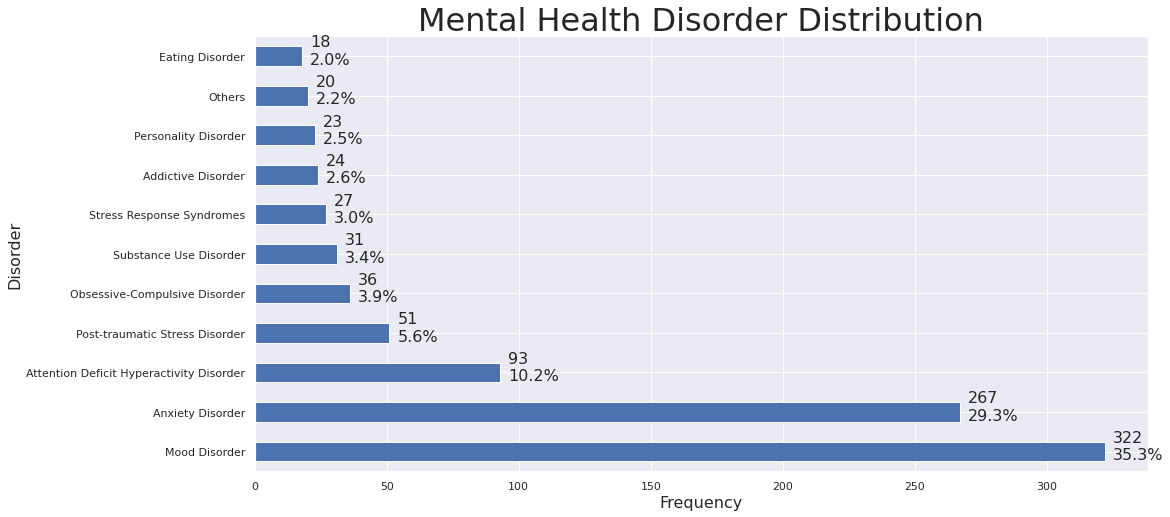

In [50]:
# plot
plot_df = mhd_df['Diagnosis'].value_counts()

fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(111)

plot_df.plot(kind='barh',ax=ax1)
ax1.set_title("Mental Health Disorder Distribution",fontsize=fs*2)
ax1.set_ylabel("Disorder",fontsize=fs)
ax1.set_xlabel("Frequency",fontsize=fs)

total=plot_df.sum()
[ax1.text(v+3,i-0.2,
          '{}\n{:.1f}%'.format(str(v),v/total*100),
          fontsize=fs) for i, v in enumerate(plot_df)]

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


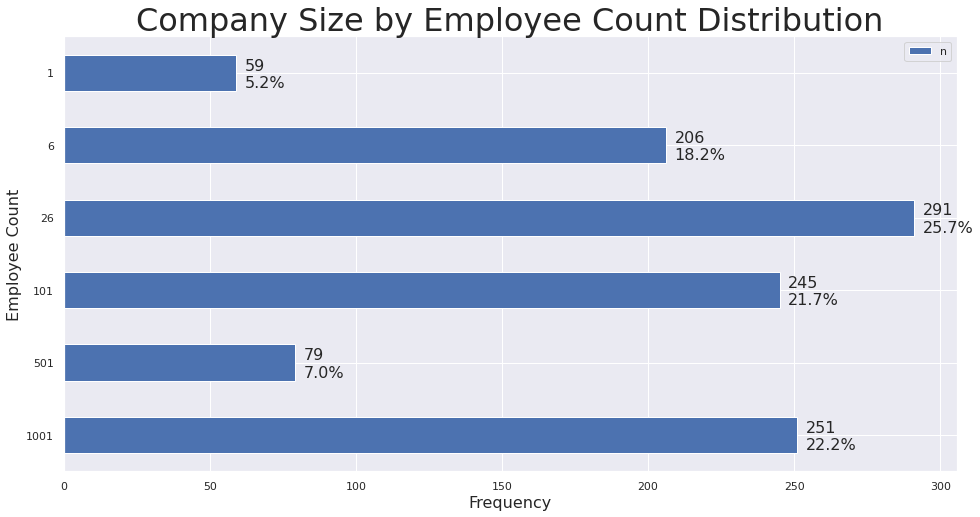

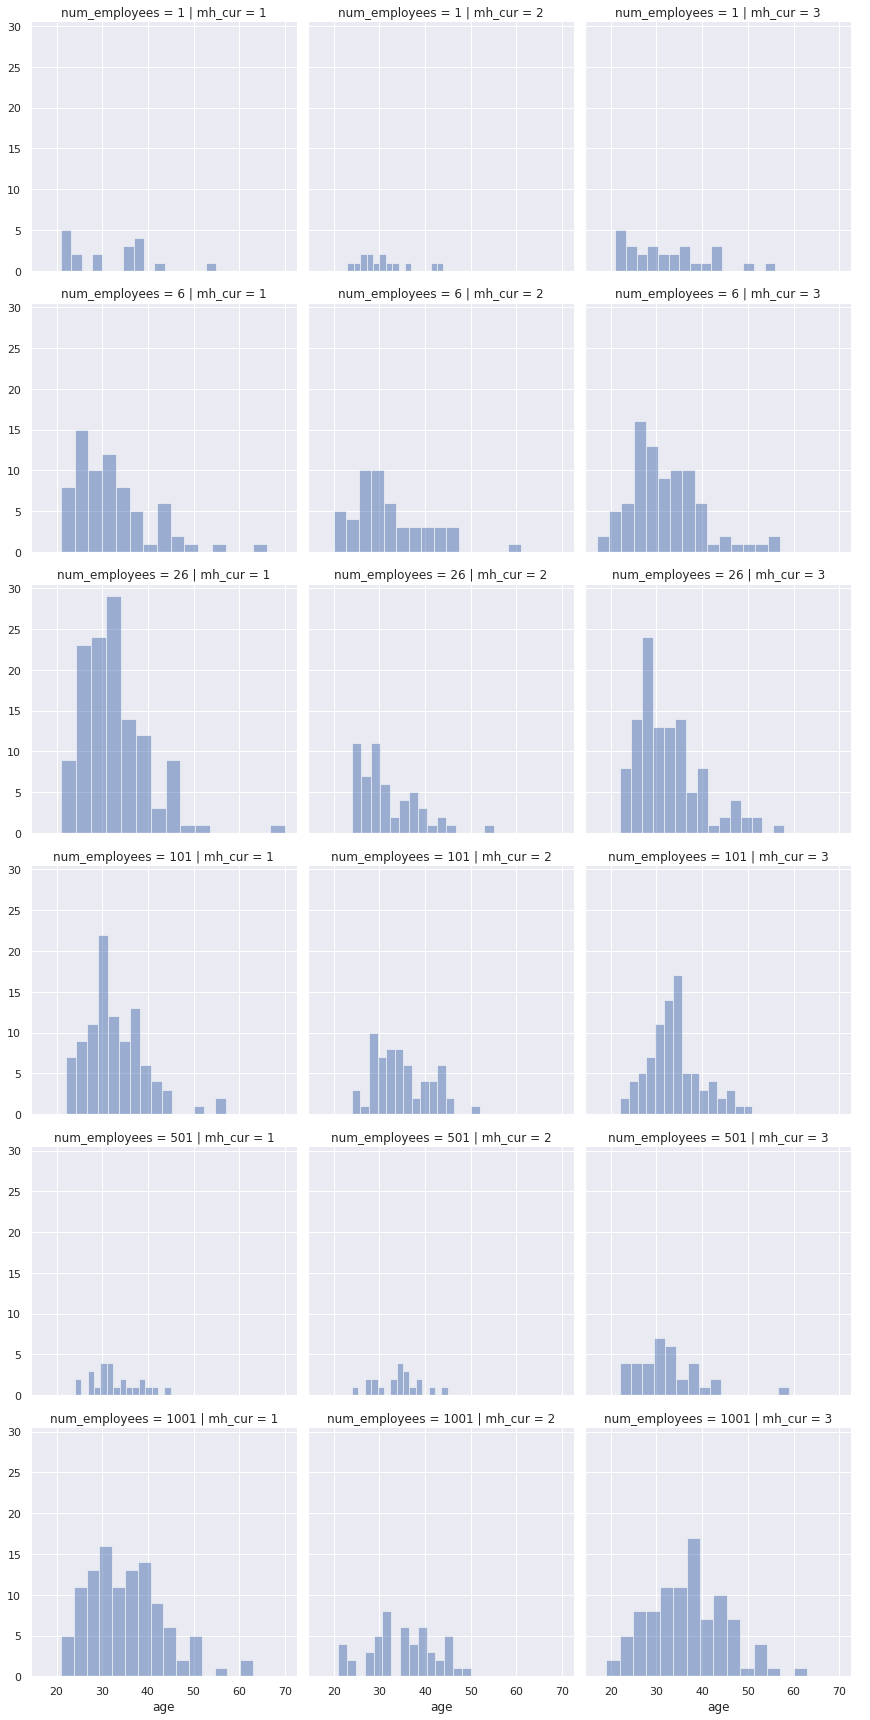

In [51]:
# Company Size Distribution
plot_df = df10['num_employees'].value_counts().reset_index(name='n').rename(columns={"index":"num_employees"}).sort_values("num_employees",ascending=False)
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
plot_df.plot(kind='barh',x = "num_employees", y = "n",ax=ax1)
ax1.set_title("Company Size by Employee Count Distribution",fontsize=fs*2)
ax1.set_ylabel("Employee Count",fontsize=fs)
ax1.set_xlabel("Frequency",fontsize=fs)
total=plot_df["n"].sum()
[ax1.text(v+3,i-0.2,
          '{}\n{:.1f}%'.format(str(v),v/total*100),
          fontsize=fs) for i, v in enumerate(plot_df["n"])]

# Prevalence of MHD across Company Size and Age
g = sns.FacetGrid(df10,row="num_employees",col="mh_cur",size=4)
g.map(plt.hist,'age',alpha=0.5,bins=15)
g.add_legend()

plt.show()

In [150]:
# obtain list of feat names
cdf10 = col_ls(df10)
len(cdf10)

0 num_employees
1 tech_company_or_role
2 cep_benefits
3 cep_know_options
4 cep_discuss
5 cep_learn
6 cep_anon
7 cep_mh_leave
8 cep_mh_ncsq
9 cep_ph_ncsq
10 cep_comf_cw
11 cep_comf_sup
12 cep_serious
13 cep_others_ncsq
14 pep_have
15 pep_benefits
16 pep_know_options
17 pep_discuss
18 pep_learn
19 pep_anon
20 pep_mh_ncsq
21 pep_ph_ncsq
22 pep_comf_cw
23 pep_comf_sup
24 pep_serious
25 pep_others_ncsq
26 fep_ph_willing
27 fep_mh_willing
28 hurt_career
29 cw_view_neg
30 comf_ff
31 neg_response
32 mh_fam_hist
33 mh_hist
34 mh_cur
35 mh_diag_pro
36 sought_treat
37 work_affect_effect
38 work_affect_ineffect
39 age
40 gender
41 work_country
42 work_remote


43

In [151]:
np.NaN

nan

# Replacing -1 with np.NaN and saving in df10_nan

In [88]:
# create df where all -1 (N.A. responses) are replaced with np.NaN
df10_nan=df10.replace({-1:np.NaN})
df10_nan.describe()

,num_employees,tech_company_or_role,cep_benefits,cep_know_options,cep_discuss,cep_learn,cep_anon,cep_mh_leave,cep_mh_ncsq,cep_ph_ncsq,cep_comf_cw,cep_comf_sup,cep_serious,cep_others_ncsq,pep_have,pep_benefits,pep_know_options,pep_discuss,pep_learn,pep_anon,pep_mh_ncsq,pep_ph_ncsq,pep_comf_cw,pep_comf_sup,pep_serious,pep_others_ncsq,fep_ph_willing,fep_mh_willing,hurt_career,cw_view_neg,comf_ff,neg_response,mh_fam_hist,mh_hist,mh_cur,mh_diag_pro,sought_treat,work_affect_effect,work_affect_ineffect,age,gender,work_country,work_remote
count,1131.00,1131.00,1050.00,998.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1003.00,1131.00,1131.00,1131.00,1131.00,1052.00,1080.00,1131.00,1131.00,1131.00,1131.00,1131.00,683.00,753.00,1131.00,1131.00,1131.00,1131.00
mean,286.86,0.78,1.70,2.05,2.52,2.21,1.80,2.74,2.20,2.70,2.10,1.92,1.96,1.92,1.11,2.65,2.85,3.39,3.22,2.73,2.27,2.39,2.28,2.68,2.93,2.58,2.07,2.55,2.62,3.03,2.42,3.04,1.87,1.82,1.99,1.50,1.43,2.62,1.53,33.32,1.28,3.27,2.08
std,400.19,0.41,0.78,0.81,0.80,0.82,0.56,1.24,0.73,0.53,0.76,0.81,0.75,0.27,0.32,1.04,1.14,0.93,1.05,0.82,0.85,0.60,0.59,1.03,0.92,0.58,0.76,0.64,0.85,0.89,1.14,1.05,0.89,0.90,0.88,0.50,0.49,0.82,0.67,7.56,0.50,6.73,0.68
min,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,17.00,1.00,0.00,1.00
25%,26.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,28.00,1.00,1.00,2.00
50%,101.00,1.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,3.00,2.00,2.00,2.00,2.00,1.00,3.00,3.00,4.00,4.00,3.00,2.00,2.00,2.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,2.00,3.00,2.00,1.00,2.00,2.00,1.00,3.00,1.00,32.00,1.00,1.00,2.00
75%,501.00,1.00,2.00,3.00,3.00,3.00,2.00,4.00,3.00,3.00,3.00,3.00,3.00,2.00,1.00,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,3.00,3.00,2.00,2.00,3.00,2.00,38.00,2.00,2.00,3.00
max,1001.00,1.00,3.00,3.00,3.00,3.00,3.00,5.00,3.00,3.00,3.00,3.00,3.00,2.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,4.00,4.00,3.00,3.00,3.00,5.00,5.00,5.00,4.00,3.00,3.00,3.00,2.00,2.00,4.00,4.00,70.00,3.00,43.00,3.00


# Plotting Correlation Matrices

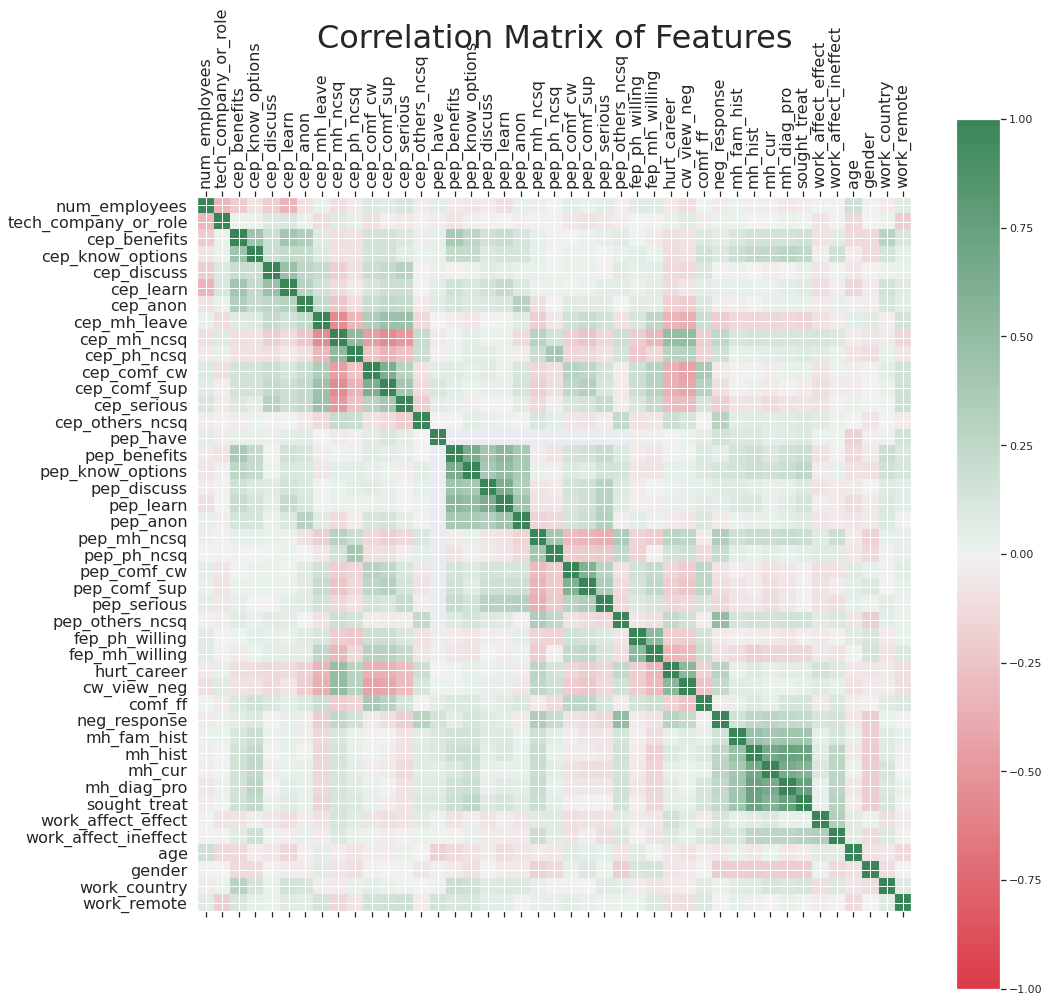

In [54]:
# plot correlatin matrix
corr = df10_nan.corr() # use df with NaN values
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = cdf10
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("Correlation Matrix of Features",fontsize=fs*2,y=1.2)

plt.show()

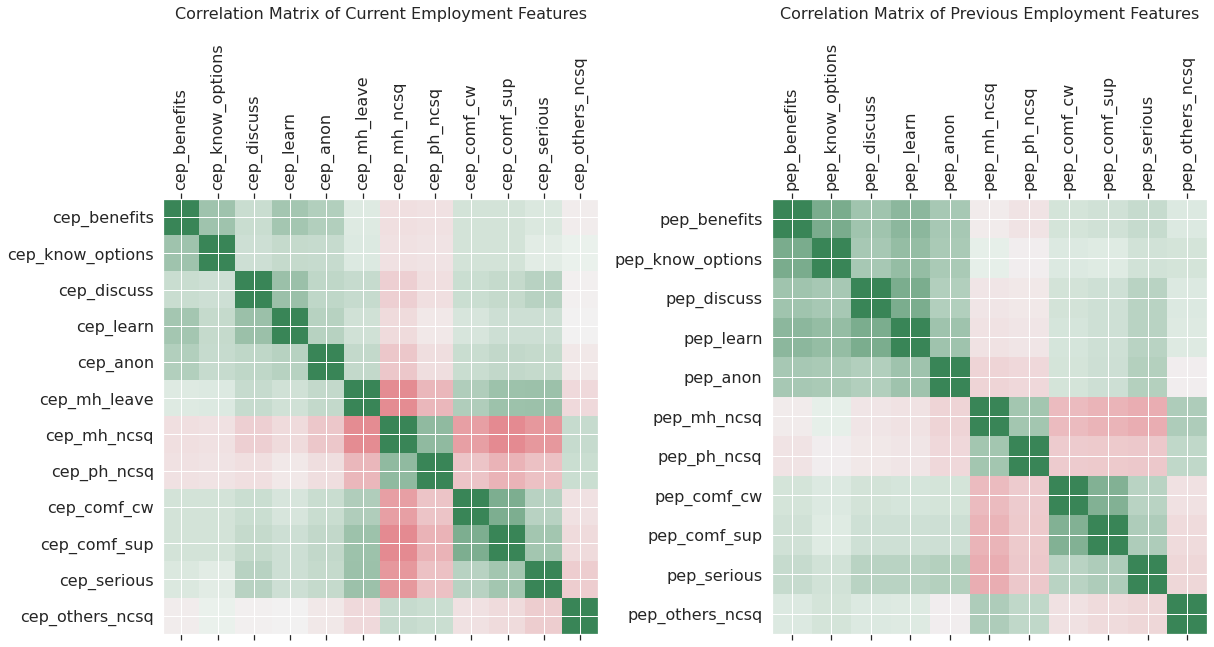

In [55]:
# top left: current employment
cep_ls=cdf10[2:14]
corr = df10_nan[cep_ls].corr()
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
cax = ax1.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))

names = cep_ls
ticks = np.arange(0,len(names),1)
ax1.set_xticks(ticks)
ax1.set_yticks(ticks)
ax1.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax1.set_yticklabels(names, fontsize=fs)
ax1.set_title("Correlation Matrix of Current Employment Features",fontsize=fs,y=1.4)

# fig.colorbar(cax) # intentionally left out for easier comparison between CM graphs

# middle: previous employment
pep_ls=cdf10[15:26]
df_corr = df10_nan[pep_ls]
corr = df_corr.corr()
ax2 = fig.add_subplot(122)
cax = ax2.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
names = pep_ls
ticks = np.arange(0,len(names),1)
ax2.set_xticks(ticks)
ax2.set_yticks(ticks)
ax2.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax2.set_yticklabels(names, fontsize=fs)
ax2.set_title("Correlation Matrix of Previous Employment Features",fontsize=fs,y=1.4)

plt.show()

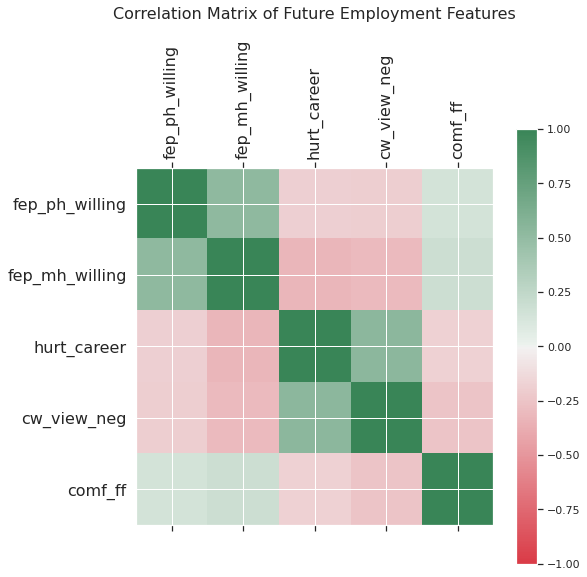

In [56]:
# middle, bottom right: future employment and perceptions
fep_ls=cdf10[26:31]
corr = df10_nan[fep_ls].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = fep_ls
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("Correlation Matrix of Future Employment Features",fontsize=fs,y=1.4)

plt.show()

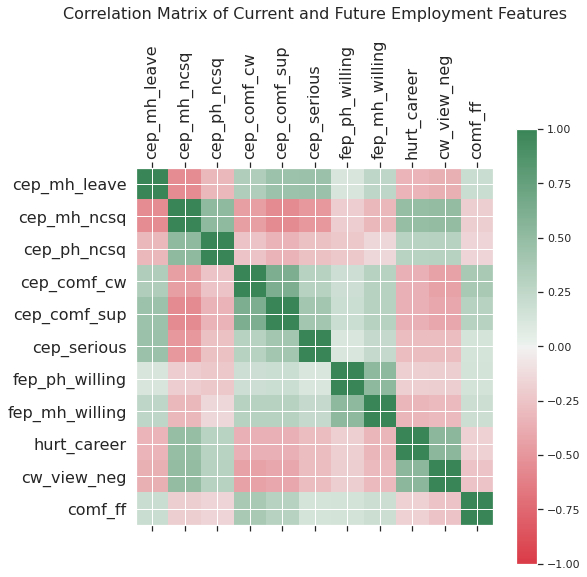

In [58]:
# bottomn left: current employment and future employment
cfep_ls = cdf10[7:13] + cdf10[26:31]
corr = df10_nan[cfep_ls].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = cfep_ls
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("Correlation Matrix of Current and Future Employment Features",fontsize=fs,y=1.4)

plt.show()

In [149]:
# prepare x variables
profile_ls = cdf10[0:2] + cdf10[30:31] + cdf10[32:35] + cdf10[39:]
cpep_ls = cdf10[2:14] + cdf10[14:26] + cdf10[28:30] + cdf10[31:32] + cdf10[37:39]
# profile_ls
# cpep_ls
x_col = profile_ls + cpep_ls
len(x_col)


39

Here we choose 3 differrent traget variable for finding important feature

In [94]:
# prepare y variables
y1_col = "fep_mh_willing"
y2_col = "mh_diag_pro"
y3_col = "sought_treat"


In [95]:
X = df10[x_col]
y1 = df10[y1_col]
y2 = df10[y2_col]
y3 = df10[y3_col]

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# For Y1

In [134]:
# prep for y1
X_train, X_test, y_train, y_test = train_test_split(X, y1, 
                                                    test_size = 0.25,
                                                   random_state=42)

In [135]:
clf = RandomForestClassifier(n_estimators=200, random_state=0)  
clf.fit(X_train, y_train) 
clf.score(X_test,y_test)
# y_pred = clf.predict(X_test)

0.7243816254416962

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn.score(X_test,y_test)

0.6431095406360424

In [137]:
# Returns the mean accuracy on the given test data and labels.
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
svc.score(X_test,y_test)

0.6996466431095406

In [100]:
print(clf.feature_importances_)

[0.03525522 0.01388844 0.03636901 0.0224697  0.02344435 0.02036097
 0.06622    0.01356463 0.03851513 0.0266622  0.02543896 0.02728949
 0.01534415 0.02301351 0.01731289 0.03444712 0.02648184 0.01207574
 0.02768971 0.03139214 0.02702903 0.00531771 0.00162362 0.02638943
 0.02436232 0.01522151 0.01534362 0.01932827 0.02580733 0.01784908
 0.02380287 0.03674167 0.02622399 0.01640746 0.06243868 0.04150505
 0.02913061 0.02390325 0.02433929]


In [101]:
y1_feat_impt = list(clf.feature_importances_)
y1_feat_impt
y1_df = pd.DataFrame({"Feature":x_col,"Importance":y1_feat_impt})
y1_sort_df = y1_df.sort_values("Importance")

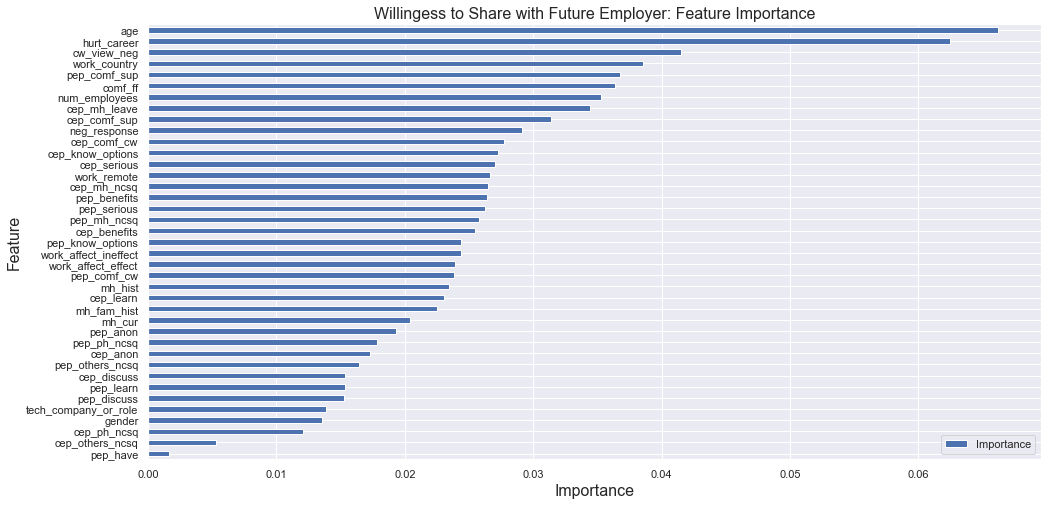

In [102]:
fig = plt.figure(figsize=dim)
ax1 = fig.add_subplot(111)

y1_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Willingess to Share with Future Employer: Feature Importance",fontsize=fs)
ax1.set_ylabel("Feature",fontsize=fs)
ax1.set_xlabel("Importance",fontsize=fs)

plt.show()

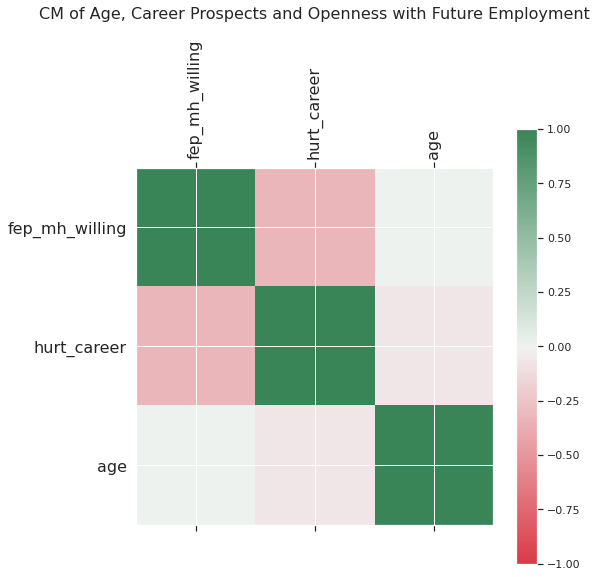

In [69]:
# To study the links between openness with future employer, age and career prospect
tmp = cdf10[27:29] + cdf10[39:40]
corr = df10_nan[tmp].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = tmp
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("CM of Age, Career Prospects and Openness with Future Employment",fontsize=fs,y=1.4)

plt.show()

# For Y2

In [140]:
# prep for y1
X_train, X_test, y_train, y_test = train_test_split(X, y2, 
                                                    test_size = 0.25)

In [141]:
clf2 = RandomForestClassifier(n_estimators=200, random_state=0)  
clf2.fit(X_train, y_train)
clf2.score(X_test,y_test)
# y_pred = clf.predict(X_test)

0.8939929328621908

In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn.score(X_test,y_test)

0.7561837455830389

In [143]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
svc.score(X_test,y_test)

0.5265017667844523

In [118]:
print(clf2.feature_importances_)

[0.01503784 0.00449401 0.02085594 0.03070502 0.19832882 0.12593026
 0.02735007 0.01221092 0.02069201 0.00964997 0.0119888  0.01621417
 0.0065602  0.00932902 0.00987157 0.01386265 0.0094455  0.00735704
 0.0085861  0.0082946  0.00928453 0.00411609 0.00077589 0.01258375
 0.01485115 0.00788335 0.0065612  0.00777365 0.01428743 0.00739387
 0.00836372 0.00849678 0.00944156 0.00686828 0.01399941 0.01216506
 0.01479333 0.18342733 0.09016909]


In [107]:
y2_feat_impt = list(clf2.feature_importances_)
# y2_feat_impt
y2_df = pd.DataFrame({"Feature":x_col,"Importance":y2_feat_impt})
y2_sort_df = y2_df.sort_values("Importance")

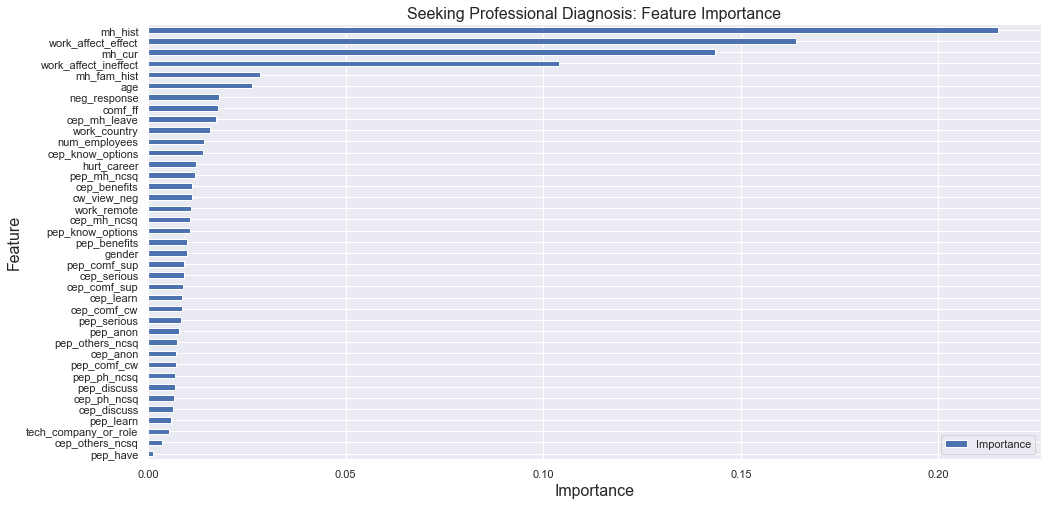

In [108]:
fig = plt.figure(figsize=dim)
ax1 = fig.add_subplot(111)

y2_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Seeking Professional Diagnosis: Feature Importance",fontsize=fs)
ax1.set_ylabel("Feature",fontsize=fs)
ax1.set_xlabel("Importance",fontsize=fs)

plt.show()

In [157]:
# drop features and retry classifier
try:
    X = X.drop(["mh_hist","mh_cur","work_affect_effect", "work_affect_ineffect"],axis=1)
except: print(err_msg)

In [158]:
# prep for y1
X_train, X_test, y_train, y_test = train_test_split(X, y2, 
                                                    test_size = 0.25)

In [160]:
clf2 = RandomForestClassifier(n_estimators=200, random_state=0)  
clf2.fit(X_train, y_train)
clf2.score(X_test,y_test)
# y_pred = clf.predict(X_test)

0.7314487632508834

In [122]:
# Returns the mean accuracy on the given test data and labels.

# 0.9310344827586207, drop from 0.9752431476569408
# but still pretty accurate

0.9336870026525199

In [123]:
print(clf2.feature_importances_)

[0.03569805 0.01063278 0.05857869 0.12196304 0.06301484 0.02630343
 0.04046183 0.02459015 0.03082268 0.0418326  0.01691548 0.02196991
 0.01717447 0.03589937 0.02198979 0.01566738 0.02214104 0.02197145
 0.02260958 0.00580332 0.0017316  0.02899784 0.02679128 0.01693929
 0.01649547 0.01848797 0.03005028 0.01878889 0.01822247 0.02094374
 0.02488843 0.01532474 0.03390922 0.02935028 0.0430386 ]


In [81]:
y2_feat_impt = list(clf2.feature_importances_)
# y2_feat_impt
y2_df = pd.DataFrame({"Feature":X.columns.tolist(),"Importance":y2_feat_impt})
y2_sort_df = y2_df.sort_values("Importance")

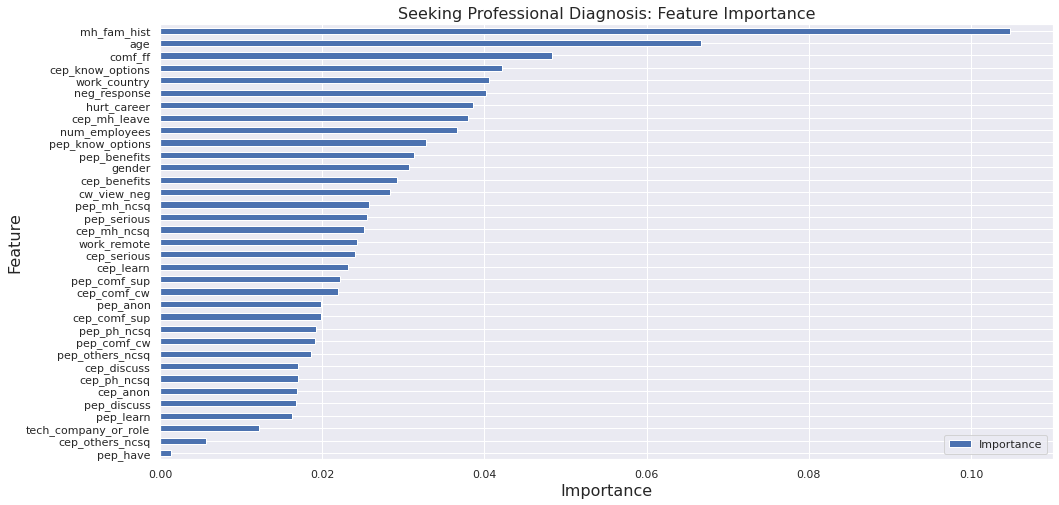

In [82]:
fig = plt.figure(figsize=dim)
ax1 = fig.add_subplot(111)

y2_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Seeking Professional Diagnosis: Feature Importance",fontsize=fs)
ax1.set_ylabel("Feature",fontsize=fs)
ax1.set_xlabel("Importance",fontsize=fs)

plt.show()

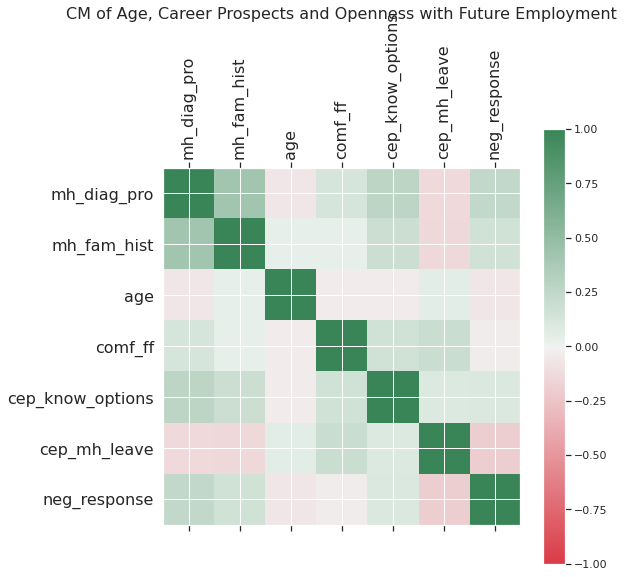

In [83]:
# To study the links between openness with future employer, age and career prospect
tmp = cdf10[35:36] + cdf10[32:33] + cdf10[39:40] + cdf10[30:31] + cdf10[3:4] + cdf10[7:8] + cdf10[31:32]
corr = df10_nan[tmp].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = tmp
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("CM of Age, Career Prospects and Openness with Future Employment",fontsize=fs,y=1.4)

plt.show()

### 4.C RFC: Seeking Treatment (90+%)

# For Y3

In [144]:
# reset X
X = df10[x_col]

In [145]:
# prep for y1
X_train, X_test, y_train, y_test = train_test_split(X, y3, 
                                                    test_size = 0.25)

In [146]:
clf3 = RandomForestClassifier(n_estimators=200, random_state=0)  
clf3.fit(X_train, y_train)
clf3.score(X_test,y_test)
# y_pred = clf.predict(X_test)

0.8763250883392226

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn.score(X_test,y_test)

0.784452296819788

In [148]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
svc.score(X_test,y_test)

0.5512367491166078

In [128]:
print(clf3.feature_importances_)

[0.01818024 0.00478826 0.02924294 0.03012948 0.19296621 0.07983943
 0.02781735 0.01233679 0.02437351 0.01013083 0.01489352 0.016291
 0.00844293 0.00942902 0.00814633 0.01988138 0.0120377  0.00806852
 0.01034836 0.01070406 0.01053437 0.00314455 0.00070277 0.01607501
 0.0143467  0.00931848 0.0079765  0.00992966 0.01417755 0.00923889
 0.00978407 0.01227154 0.01432552 0.00797728 0.01416925 0.01212172
 0.01738966 0.16560651 0.10286209]


In [89]:
y3_feat_impt = list(clf.feature_importances_)
# y3_feat_impt
y3_df = pd.DataFrame({"Feature":x_col,"Importance":y3_feat_impt})
y3_sort_df = y3_df.sort_values("Importance")

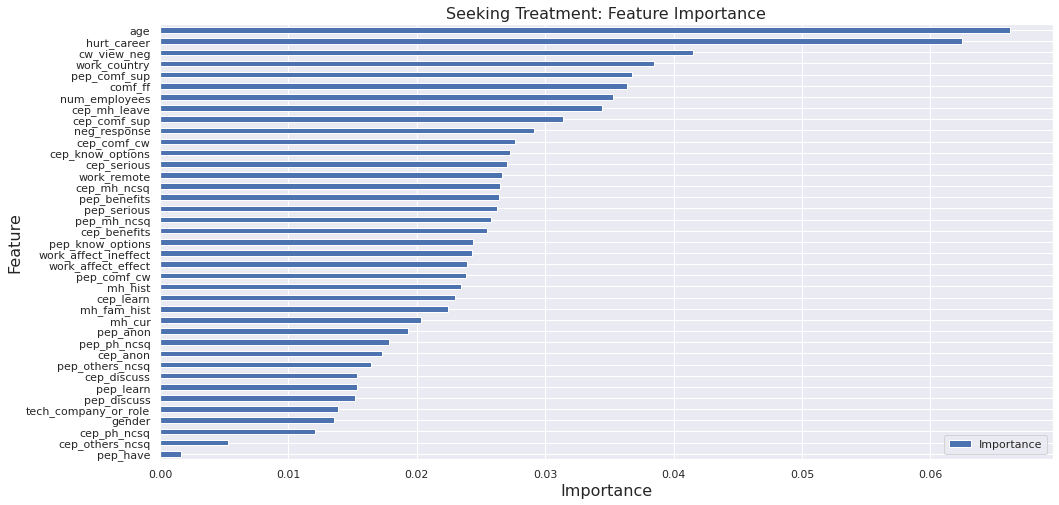

In [90]:
fig = plt.figure(figsize=dim)
ax1 = fig.add_subplot(111)

y3_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Seeking Treatment: Feature Importance",fontsize=fs)
ax1.set_ylabel("Feature",fontsize=fs)
ax1.set_xlabel("Importance",fontsize=fs)

plt.show()

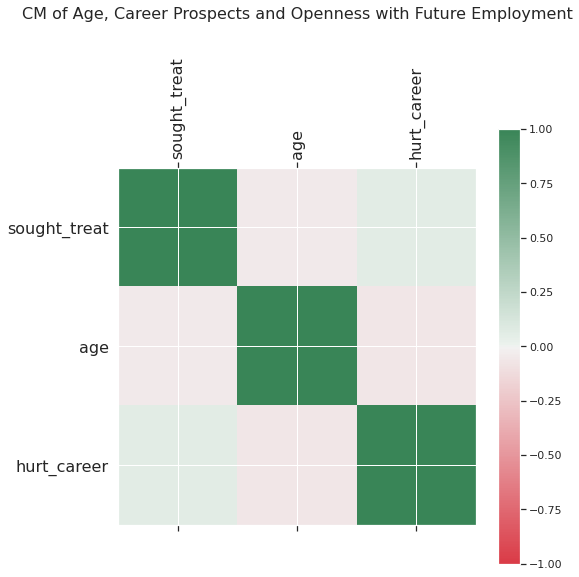

In [91]:
# To study the links between openness with future employer, age and career prospect
tmp = cdf10[36:37] + cdf10[39:40] + cdf10[28:29]
corr = df10_nan[tmp].corr()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,vmin=-1,vmax=1,
                 cmap=sns.diverging_palette(10, 500, as_cmap=True))
fig.colorbar(cax)
names = tmp
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,fontsize=fs,rotation='vertical')
ax.set_yticklabels(names, fontsize=fs)
ax.set_title("CM of Age, Career Prospects and Openness with Future Employment",fontsize=fs,y=1.4)

plt.show()

In [152]:
df10.columns

Index(['num_employees', 'tech_company_or_role', 'cep_benefits',
       'cep_know_options', 'cep_discuss', 'cep_learn', 'cep_anon',
       'cep_mh_leave', 'cep_mh_ncsq', 'cep_ph_ncsq', 'cep_comf_cw',
       'cep_comf_sup', 'cep_serious', 'cep_others_ncsq', 'pep_have',
       'pep_benefits', 'pep_know_options', 'pep_discuss', 'pep_learn',
       'pep_anon', 'pep_mh_ncsq', 'pep_ph_ncsq', 'pep_comf_cw', 'pep_comf_sup',
       'pep_serious', 'pep_others_ncsq', 'fep_ph_willing', 'fep_mh_willing',
       'hurt_career', 'cw_view_neg', 'comf_ff', 'neg_response', 'mh_fam_hist',
       'mh_hist', 'mh_cur', 'mh_diag_pro', 'sought_treat',
       'work_affect_effect', 'work_affect_ineffect', 'age', 'gender',
       'work_country', 'work_remote'],
      dtype='object')

In [154]:
cdf10[1]

'tech_company_or_role'

In [156]:
df10.shape

(1131, 43)